# Machine Learning Text Classification Project using the Scikit-Learn Library

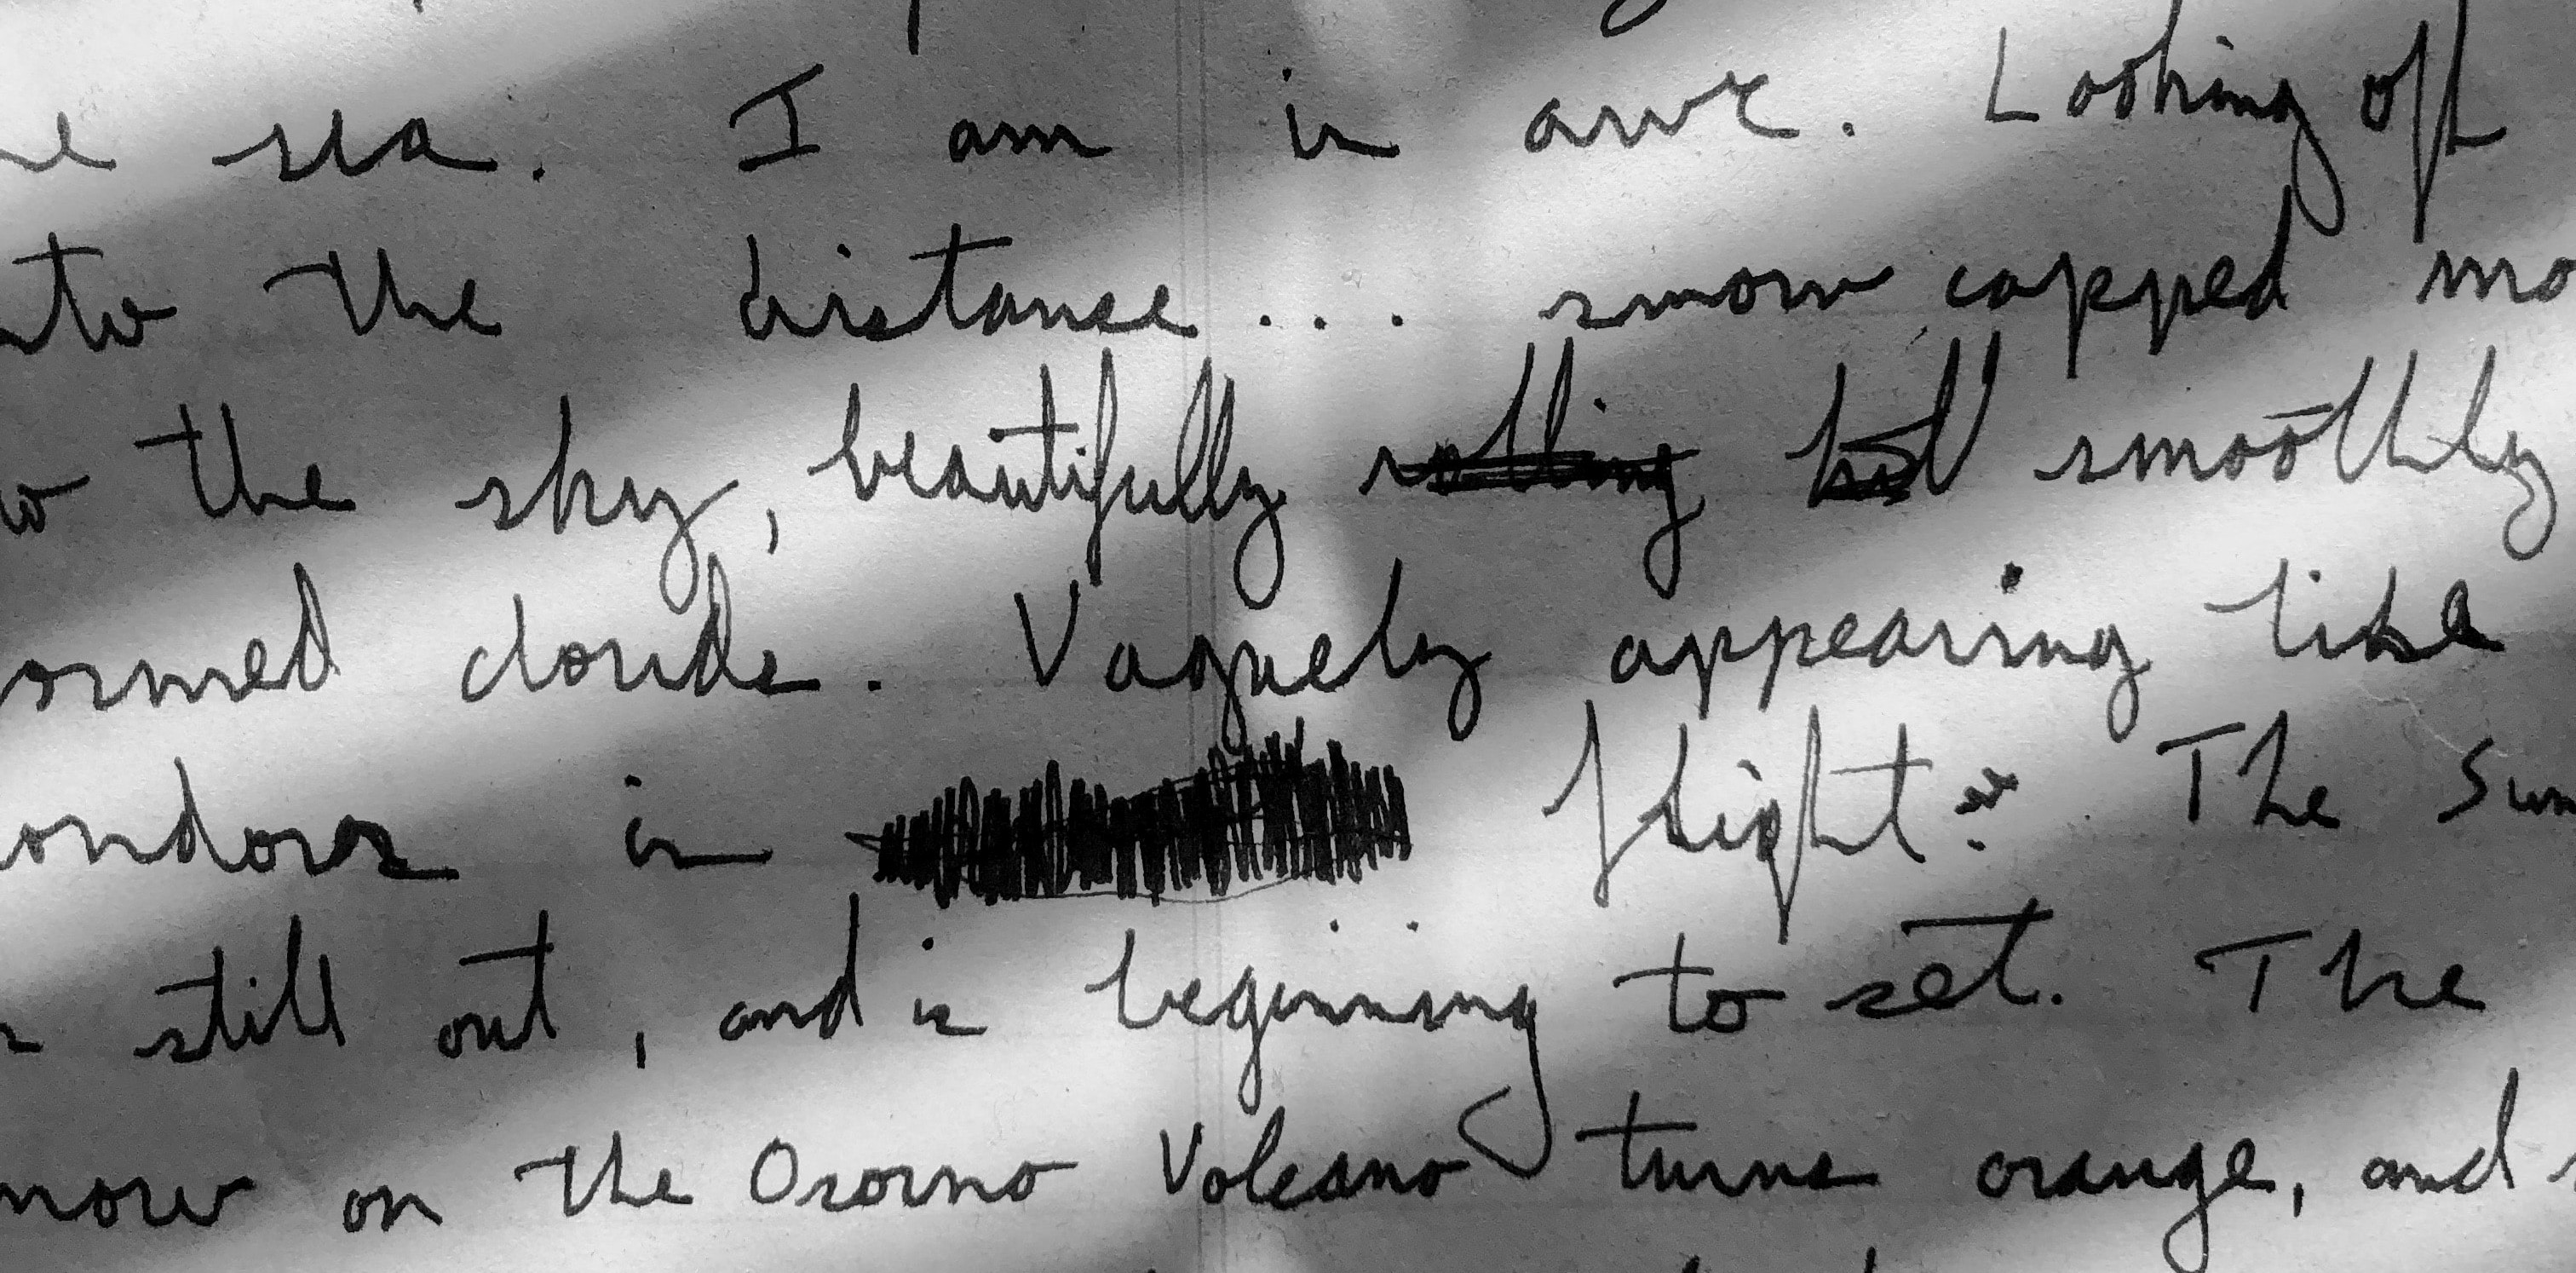
<br>
Photo by Micah Boswell on Unsplash.com.

### Enhance your machine learning skills by creating a simple text classification code project. This article will guide you through all necessary steps to confidently understand and utilize the Python Scikit-Learn library.

# Table of Contents

- Install and Import Required Modules
- Load Dataset and Perform Feature Extraction
- Train and Evaluate Machine Learning Models
- Conclusion
- References

## Introduction

The Scikit-Learn [1] library is an open-source module that contains most functions we need in creating machine learning applications. In this article, we are going to use the Scikit-Learn library to create machine learning models that classify text documents. Let's get started!
<br><br>
Note: The code in this article is referenced from the official Scikit-Learn repository [2] and modified to better suit beginners.

## Install and Import Required Modules

It is a good practice to have a separate virtual environment for every coding project. Follow the following guidance to create one via the Anaconda Navigator.

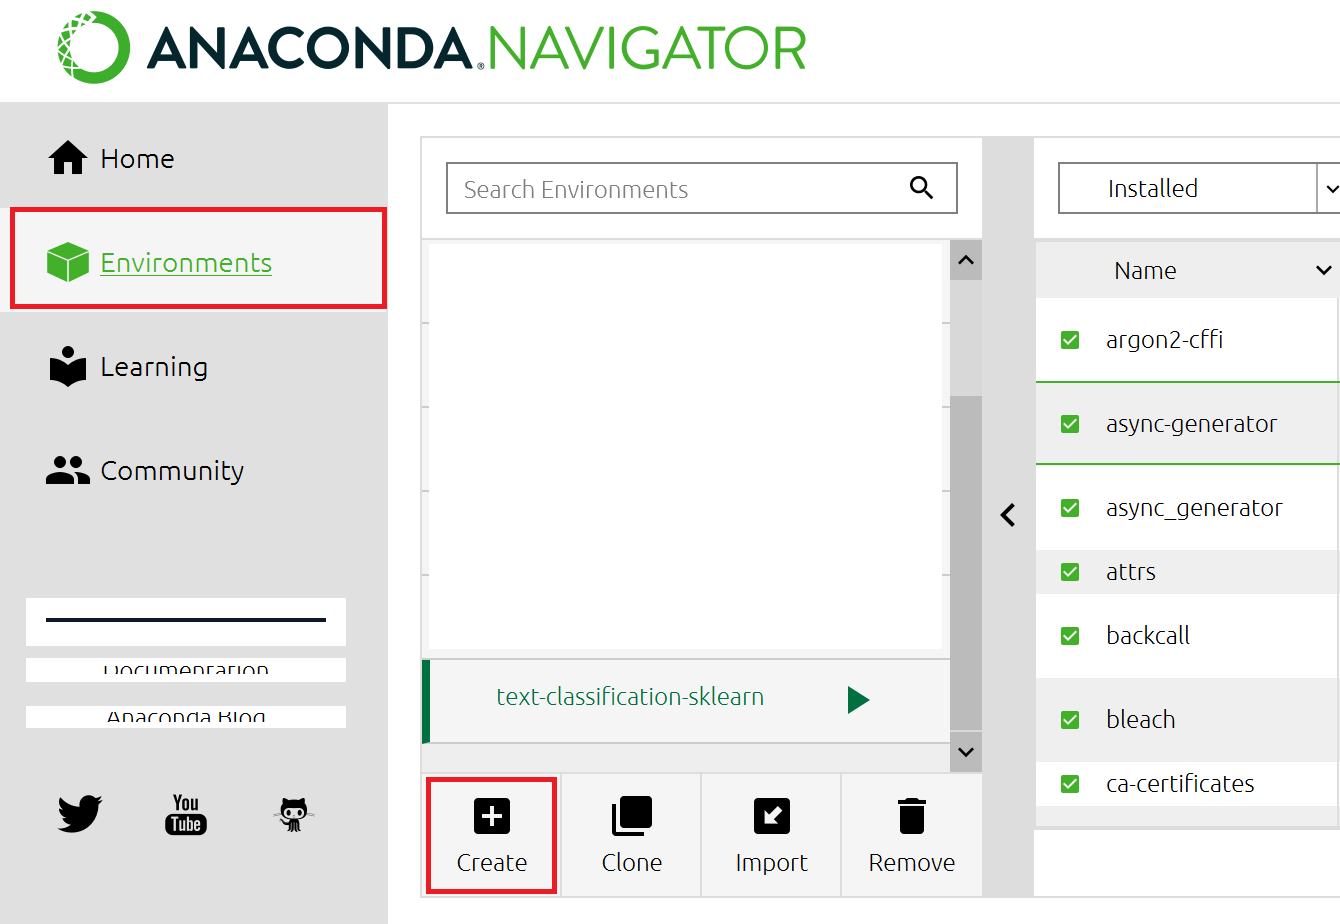
<br>
Figure: At the Environments tab, click on the Create button to create a virtual environment.

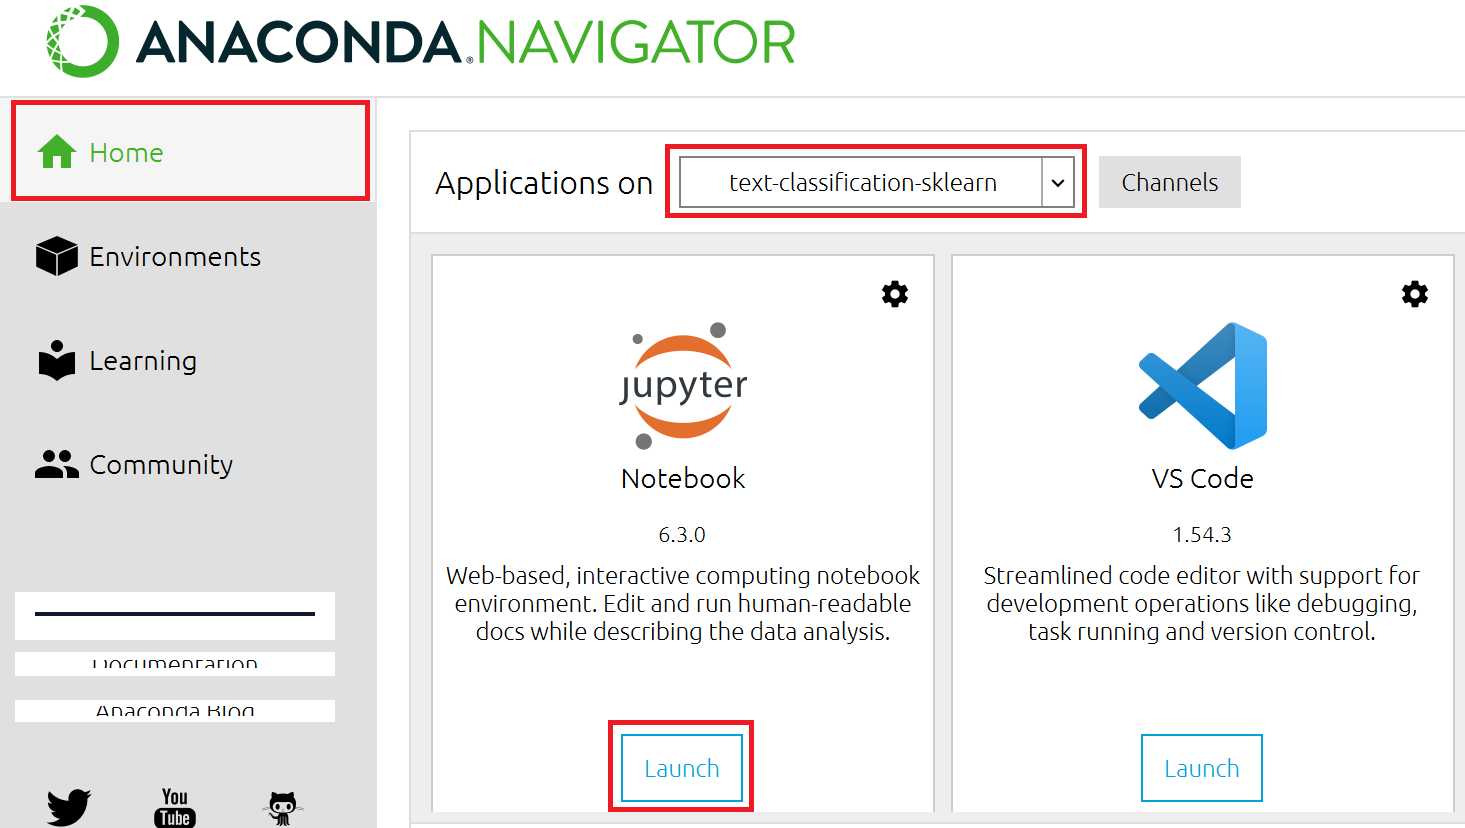
<br>
Figure: At the Home tab, select a virtual environment and launch a Jupyter Notebook.

Feel free to upload this notebook in your virtual environment and follow along. 
<br><br>
First, execute the following cells to install and import the Scikit-Learn (Sklearn) and the Numpy libraries. The former will be used for machine learning implementations while the latter for data manipulation. 

In [1]:
!pip install scikit-learn
!pip install numpy

In [2]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

We'll learn about these functions as we code along.

## Load Dataset and Perform Feature Extraction

Instead of downloading a dataset, we are going to fetch it via the 'fetch_20newsgroups' method from Sklearn Datasets. The dataset is named Twenty Newsgroups, containing 20,000 documents labeled into 20 categories. We will use only four classes for this tutorial.
<br><br>
Execute the cell below to fetch a training set with selected categories:

In [3]:
categories = ['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

We used the 'fetch_20newsgroups' method to obtain a training set containing four classes and assigned it to the variable 'twenty_train'.
<br><br>
Execute the following cell to get all class names of the training set:

In [4]:
twenty_train.target_names

['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.med']

Done. Now, let's check how many documents we have:

In [5]:
len(twenty_train.data)

2363

There are 2,363 rows of data. See how it looks like by displaying the first document:

In [6]:
# display example data

twenty_train.data[0].split("\n")

['From: N020BA@tamvm1.tamu.edu',
 'Subject: Help! Need 3-D graphics code/package for DOS!!!',
 'Organization: Texas A&M University',
 'Lines: 7',
 'NNTP-Posting-Host: tamvm1.tamu.edu',
 '',
 '    Help!! I need code/package/whatever to take 3-D data and turn it into',
 "a wireframe surface with hidden lines removed. I'm using a DOS machine, and",
 "the code can be in ANSI C or C++, ANSI Fortran or Basic. The data I'm using",
 'forms a rectangular grid.',
 '   Please post your replies to the net so that others may benefit. IMHO, this',
 'is a general interest question.',
 '   Thank you!!!!!!',
 '']

The data looks like an email containing sender details, subject line, and text content.
<br><br>
Let's check which category this document belongs to. Execute the following cell:

In [7]:
# display target name of example data

twenty_train.target_names[twenty_train.target[0]]

'comp.graphics'

We looked up the category ID of the document and used it to obtain its category name, which is 'comp.graphics'.
<br><br>
Computers do not understand text information as humans do. Therefore, we need to convert text into numerical feature vectors for the models to interpret it better. Feature vectors are an array of numbers that represent every word frequency in a text document. We will use the 'CountVectorizer' function of Sklearn for the conversion.
<br><br>
Execute the following cell to convert all documents as feature vectors:

In [8]:
# tokenizing text: transform text to feature vectors

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(raw_documents=twenty_train.data)
X_train_counts.shape

(2363, 35324)

The 'fit_transform' method creates a dictionary of feature indices based on the supplied data. All words contained in the feature dictionary are already preprocessed, tokenized (stemmed to root words), and filtered (stopwords removed).
<br><br>
The 'X_train_counts' dictionary has a dimension of (2,363 x 35,324). It contains 2,363 rows of features (the number of documents), and each feature vector has a length of 35,324 (there are 35,324 unique words in the training set). 
<br><br>
For every document, the CountVectorizer scans through its content and marks the frequency of words at the respective feature vector index positions. 
<br><br>
Next, we will further process the feature vectors with the 'TfidfTransformer' function of Sklearn. Execute the following cell:

In [9]:
# tdidf transform

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X=X_train_counts)
X_train_tfidf.shape

(2363, 35324)

The codes are identical with the CountVectorizer implementation, except that the 'TfidfTransformer' function is used. It is called 'Term Frequency Times Inverse Document Frequency', which normalizes the weights between documents and makes short and long documents fairer to be compared. 
<br><br>
We are done with the feature extraction step. Let's get to the highlight of the show!

## Train and Evaluate Machine Learning Models

We will create and compare the performances between a Multinomial Naive Bayes model and a Linear Support Vector Machine model. Both classifiers will output a predicted category of a given input. 
<br><br>
Execute the following cell for model training and prediction:

In [10]:
# model: naive bayes
clf_nb = MultinomialNB().fit(X=X_train_tfidf, y=twenty_train.target)
clf_svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, 
                        random_state=42, max_iter=5, tol=None).fit(X=X_train_tfidf, y=twenty_train.target)

# preprocess test data
docs_short = ['This car model has a better performance', 'OpenGL on the GPU is fast']
X_test_counts = count_vect.transform(raw_documents=docs_short)
X_test_tfidf = tfidf_transformer.transform(X=X_test_counts)

# prediction
predicted_nb = clf_nb.predict(X=X_test_tfidf)
predicted_svm = clf_svm.predict(X=X_test_tfidf)

# print prediction outcome
print("Prediction of the Naive Bayes model:")
for doc, category in zip(docs_short, predicted_nb):
    print(f"{doc} => {twenty_train.target_names[category]}")

print("Prediction of the SVM model:")
for doc, category in zip(docs_short, predicted_svm):
    print(f"{doc} => {twenty_train.target_names[category]}")

Prediction of the Naive Bayes model:
This car model has a better performance => rec.autos
OpenGL on the GPU is fast => comp.graphics
Prediction of the SVM model:
This car model has a better performance => rec.autos
OpenGL on the GPU is fast => comp.graphics


We defined and trained a Naive Bayes classifier using the 'MultinomialNB' function, and a SVM classifier using the 'SGDClassifier' function that come with Sklearn. We stated the SVM classifier with some hyperparameter settings, such as loss function, penalty function, and alpha value. We created a list with two short sentences as the test data. The same text preprocessor, 'count_vect' and 'tfidf_transformer' are used. The variable 'predicted' contains the outcome of the predicted categories. Lastly, we displayed the prediction result. The first sentence is predicted as the 'rec.autos' class and the second sentence is predicted as the 'comp.graphics' class from both models. 
<br><br>
Now, let's structure the machine learning process better. Execute the following cell to create a pipeline for data preprocessing, and use it for model training and prediction:

In [11]:
# build a proper pipeline with a process of preprocessing and model training
pipe_clf_nb = Pipeline(steps=[
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# train
pipe_clf_nb.fit(X=twenty_train.data, y=twenty_train.target)

# evaluate using a proper test set
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
predicted = pipe_clf_nb.predict(X=twenty_test.data)

print(f"Mean accuracy score: {np.mean(predicted == twenty_test.target)*100:.2f}%")

Mean accuracy score: 90.28%


All input goes through the same steps in a pipeline. We used the 'Pipeline' function from Sklearn and passed it the three steps: the 'CountVectorizer', 'TfidfTransformer', and 'MultinomialNB' functions. Once the model is trained, we obtained a proper test set using the 'fetch_20newsgroups' method. All parameters stayed the same, except that we specified for the 'test' set. A mean test accuracy score is computed. 
<br><br>
We have created a machine learning pipeline that performed very well (90%)! Let's compare its performance with another model. Execute the following code to create an SVM pipeline:

In [12]:
# second model: support vector machine
pipe_clf_svm = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None))
])

# train
pipe_clf_svm.fit(twenty_train.data, twenty_train.target)

# prediction and evaluation
predicted = pipe_clf_svm.predict(twenty_test.data)
print(f"Mean accuracy score: {np.mean(predicted == twenty_test.target)*100:.2f}%")

Mean accuracy score: 92.63%


The codes are very similar to the last one, except that the classifier is changed to 'SDGClassifier'. 
<br><br>
The mean test accuracy score of the SVM model is 92%, slightly better than the Naive Bayes model. That's great! Following, we will display the result of the model prediction category-wise. Execute the following cells:

In [13]:
# classification report

print(metrics.classification_report(y_true=twenty_test.target, y_pred=predicted, target_names=twenty_test.target_names))

                 precision    recall  f1-score   support

  comp.graphics       0.89      0.93      0.91       389
      rec.autos       0.94      0.96      0.95       396
sci.electronics       0.91      0.91      0.91       393
        sci.med       0.96      0.91      0.94       396

       accuracy                           0.93      1574
      macro avg       0.93      0.93      0.93      1574
   weighted avg       0.93      0.93      0.93      1574



In [14]:
# confusion matrix

metrics.confusion_matrix(y_true=twenty_test.target, y_pred=predicted)

array([[363,   9,  12,   5],
       [  5, 379,  11,   1],
       [ 21,   8, 356,   8],
       [ 17,   8,  11, 360]], dtype=int64)

The classification report calculates four types of scores: precision, recall, f1-score, and support. They compute a less biased performance result compared to a mean accuracy score (displayed on the report as 'accuracy'). The confusion matrix compares the overlapping of information between actual and predicted labels. 

## Conclusion

That's it! You have just created a text classification project using the Scikit-Learn library. In this article, we've discussed data preprocessing, model training, and evaluation. Hope you enjoyed it! 

## References

[1] https://scikit-learn.org/stable/index.html
<br>
[2] https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html